# Exploring MLPs for Image Classification

### Personal Exploration of MLPs

In this project, I also wanted to contrast CNNs with Multi-Layer Perceptrons (MLPs). MLPs are another type of neural network that operate on flattened input data and rely on fully connected layers to learn patterns in data. 

Using the same MNIST dataset, I'll train MLP models and observe how they perform compared to CNNs. This exploration will help me understand the strengths and limitations of MLPs in image classification tasks.

# Exploring CNNs for Image Classification

### Personal Exploration of CNNs

In this project, I wanted to dive deeper into Convolutional Neural Networks (CNNs) and understand their role in image recognition and classification tasks. CNNs are widely used for applications like object detection, face recognition, and more. 

Here, I'm using the popular MNIST dataset of 28x28 grayscale images of digits (0-9) to experiment with how CNNs can classify these digits accurately. By building and training CNN models, I'll explore the effects of different layers like convolutional, pooling, and fully connected layers, along with activation functions like Softmax, to achieve optimal performance.

In [ ]:
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(x_train.shape)

(60000, 28, 28)


Create a plot of the first nine images in the training dataset.

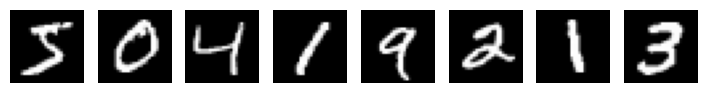

In [ ]:
import matplotlib.pyplot as plt
# plot first few images
plt.figure(figsize=(10, 10))

for i in range(8):
  plt.subplot(190 + 1 + i) # Lay the pictures in one row
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray')) # Display the image
  plt.axis('off')

plt.show()

Q1. To process images in neural network, we have to indicate how may channels (depth) we are going to use. For instance, a coloful image from a standard digital camera will have a red, green and blue channel (RGB), so it has 3 channels (i.e. depth=3) in total, whereas a grayscale image only has 1 channel (depth=1).

The Fashion-MNIST dataset is grayscale, and we can reshape Fashion-MNIST to have a single channel. (i.e., Convert each 28 x 28 image of the train and test set into a matrix of size 28 x 28 x 1.)

In [ ]:
### YOUR CODE HERE ###
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

We know that the pixel values for each image in the dataset are unsigned integers in the range between black and white, or 0 and 255.

Q2. Normalize the pixel values of grayscale images, e.g. rescale them to the range [0, 1].

In [ ]:
### YOUR CODE HERE ###
# We can normalize the data dividing them by 255
x_train = x_train / 255
x_test = x_test / 255

Q3. You also need to convert the target values into binary values (one-hot encoding).

In [ ]:
### YOUR CODE HERE ###
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

# Reshape labels to 2D array with one column
y_train_convert = y_train.reshape(-1, 1)
y_test_convert = y_test.reshape(-1, 1)

y_train_convert = encoder.fit_transform(y_train_convert)
y_test_convert = encoder.transform(y_test_convert)

In [ ]:
# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', y_train_convert[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Q4. Implement build_cnn_model() that returns a CNN model that takes an input of image, passes it to:
- A convolution layer with 32 filters and filter/kernel size 5x5
- A MaxPool layer of size 2x2
- Another convolution layer with 64 filters and kernel size 5x5
- Another MaxPool layer of size 2x2
- Another convolution layer with 128 filters and kernel size 3x3
- Another MaxPool layer of size 2x2
- Flatten it
- Add one regular fully-connected layer of 128 units
- Finally, output your classification by another fully-connected layer, whose number of units is determined by yourself.

Our goal is to minimize the entropy loss.

As before, use the "relu" activation function for all the convolution/full-connected layers, but use the "softmax" activation for the final fully-connected layer (readout layer).

The optimizer and loss function have been filled in for you.

https://www.tensorflow.org/tutorials/images/cnn:

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B).

the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels/depth). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels/depth for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

(See https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2)

Pooling: After a convolution operation we usually perform pooling to reduce the dimensionality. This enables us to reduce the number of parameters, which both shortens the training time and combats overfitting. Pooling layers downsample each feature map independently, reducing the height and width, keeping the depth intact.

Padding: is commonly used in CNN to preserve the size of the feature maps, otherwise they would shrink at each layer, which is not desirable. The 3D convolution figures we saw above used padding, that’s why the height and width of the feature map.

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will **flatten** (or unroll) the 3D output to 1D, then add one or more Dense layers on top. The data 10 output classes, so you use a final Dense layer with 10 outputs.

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

def build_cnn_model():
    model = Sequential()
    ### YOUR CODE HERE ###
    ######################

    model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1), padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    return model

model = build_cnn_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 274,826 (1.05 MB)

 Trainable params: 274,826 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

Q5. Fit your model by x_train, y_train

In [ ]:
### YOUR CODE HERE ###
#8 mins
model.fit(x_train, y_train_convert, epochs=10, batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8653 - loss: 0.4388
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9850 - loss: 0.0488
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9897 - loss: 0.0320
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9934 - loss: 0.0213
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9943 - loss: 0.0186
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9959 - loss: 0.0130
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9960 - loss: 0.0125
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9971 - loss: 0.0089
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9968 - loss: 0.0090
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9971 - loss: 0.0092


Q6. Evaluate your model on test set and print out the entropy loss and the accuracy

In [ ]:
### YOUR CODE HERE ###
test_loss, test_accuracy = model.evaluate(x_test, y_test_convert)
print("Test loss with CNN:", test_loss)
print("Test accuracy with CNN:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9870 - loss: 0.0427
Test loss with CNN: 0.03741440176963806
Test accuracy with CNN: 0.9894000291824341


# Exploring MLPs for Image Classification

### Personal Exploration of MLPs

In this project, I also wanted to contrast CNNs with Multi-Layer Perceptrons (MLPs). MLPs are another type of neural network that operate on flattened input data and rely on fully connected layers to learn patterns in data. 

Using the same MNIST dataset, I'll train MLP models and observe how they perform compared to CNNs. This exploration will help me understand the strengths and limitations of MLPs in image classification tasks.

In [ ]:
def build_mlp_model():
    model = Sequential()
    ### YOUR CODE HERE ###

    model.add(layers.Flatten(input_shape=(28, 28, 1)))

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    ######################
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    return model

model2 = build_mlp_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

# Exploring MLPs for Image Classification

### Personal Exploration of MLPs

In this project, I also wanted to contrast CNNs with Multi-Layer Perceptrons (MLPs). MLPs are another type of neural network that operate on flattened input data and rely on fully connected layers to learn patterns in data. 

Using the same MNIST dataset, I'll train MLP models and observe how they perform compared to CNNs. This exploration will help me understand the strengths and limitations of MLPs in image classification tasks.

In [ ]:
### YOUR CODE HERE ### #1 min
model2.fit(x_train, y_train_convert, epochs=10, batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8303 - loss: 0.6161
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9553 - loss: 0.1542
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9700 - loss: 0.1034
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9789 - loss: 0.0696
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9836 - loss: 0.0543
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9862 - loss: 0.0452
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9893 - loss: 0.0349
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9919 - loss: 0.0282
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9935 - loss: 0.0225
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9949 - loss: 0.0194


Q9. Evaluate your model on test set and print out the entropy loss and the accuracy

In [ ]:
### YOUR CODE HERE ###
test_loss2, test_accuracy2 = model2.evaluate(x_test, y_test_convert)
print("Test loss with MLP:", test_loss2)
print("Test accuracy with MLP:", test_accuracy2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9737 - loss: 0.0959
Test loss with MLP: 0.08222568035125732
Test accuracy with MLP: 0.9763000011444092


Q10. Which of the above 2 models worked best for you? Explain in details the reason for good/bad performance for each of the models.

# Exploring MLPs for Image Classification

### Personal Exploration of MLPs

In this project, I also wanted to contrast CNNs with Multi-Layer Perceptrons (MLPs). MLPs are another type of neural network that operate on flattened input data and rely on fully connected layers to learn patterns in data. 

Using the same MNIST dataset, I'll train MLP models and observe how they perform compared to CNNs. This exploration will help me understand the strengths and limitations of MLPs in image classification tasks.

# Exercise 2
### Autoencoder

So far, we have learned a lot about how to use neural networks in supervised learning, but in fact there are also many applications of neural networks in unsupervised learning such as autoencoder.

An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error.

In this part, we will continue using Fashion-MNIST dataset.

Q11. Implement an autoencoder model that takes an input of 28x28x1 images, compress them into (4,) vectors by an econder, and then decompress them back to 28x28 images by a decoder. In other words, the orginal dimensionality is 784 (=28x28), but we want to compress it into the dimensionality of 9 by an encoder, then reconstruct these (9,) vectors back to 28x28 images by an decoder.

You only need to define an encoder and a decoder. In your encoder, you need to inlude a flatten layer and several fully-connected layers, while in your decoder, you are required to use fully-connected layers and one reshape layer. Do not use other types of layers.

You will determine the number of fully-connected layers, number of units, and activation functions by yourself.

The optimizer and loss function have been filled in for you.

In [ ]:
from keras.models import Model
from keras.layers import Reshape, Input
# encoder layers
encoded = Sequential()
encoded.add(Flatten(input_shape=(28, 28, 1)))
encoded.add(Dense(128, activation='relu'))
encoded.add(Dense(64, activation='relu'))
encoded.add(Dense(9, activation='relu'))
######################

# decoder layers
decoded = Sequential()
decoded.add(Dense(64, activation='relu', input_shape=(9,)))
decoded.add(Dense(128, activation='relu'))
decoded.add(Dense(28*28, activation='sigmoid'))
decoded.add(Reshape((28, 28, 1)))
######################

input_x = Input(shape=(28, 28, 1))
code = encoded(input_x)
output = decoded(code)

# This model maps an input to its reconstruction
autoencoder = Model(input_x,output)

autoencoder.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Q12. Fit your model by x_train only

In [ ]:
### YOUR CODE HERE ###
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0770
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0307
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0263
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0246
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0233
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0222
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0214
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0208
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0203
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0198


Q13. Evaluate your model on test set and print out the MSE and output images as numpy arrays.

In [ ]:
# Test your autoencoder on test set, print out the MSE
### YOUR CODE HERE ###

import numpy as np

# output images as numpy arrays
encoded_imgs = encoded(x_test).numpy()
decoded_imgs = decoded(encoded_imgs).numpy()

mse = np.mean(np.power(x_test - decoded_imgs, 2))
print("MSE:", mse)

MSE: 0.019423027835590582


Plot your encoded image

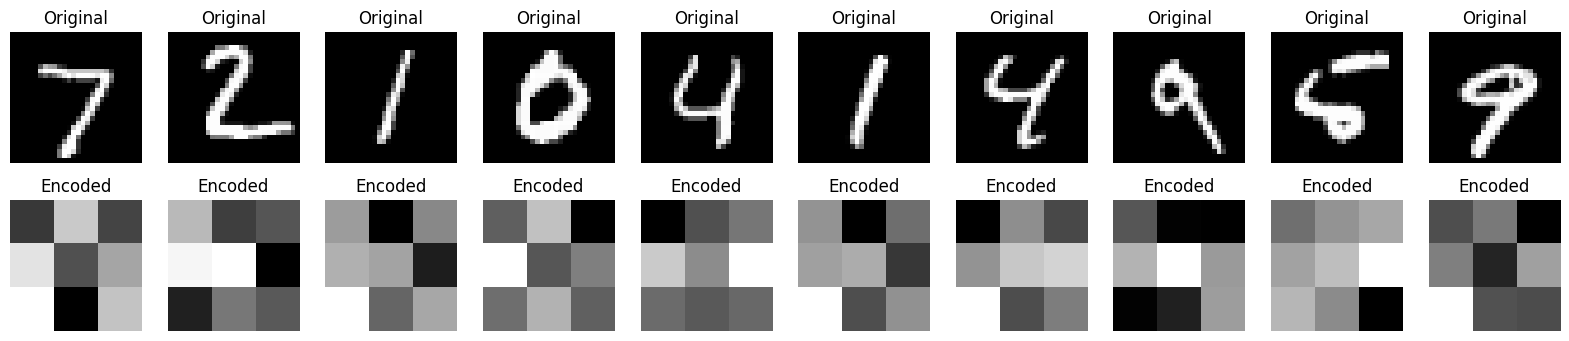

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
  plt.title("Original")
  plt.axis('off')

  # display encoded image
  plt.subplot(2, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(3, 3), cmap='gray')
  plt.title("Encoded")
  plt.axis('off')

plt.show()

Plot your decoded image

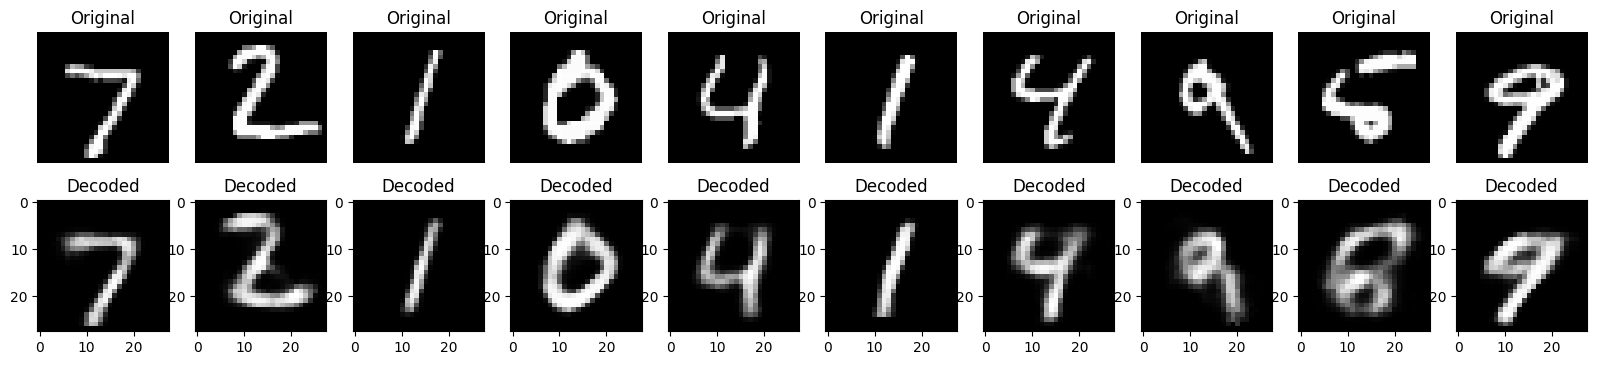

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
  plt.title("Original")
  plt.axis('off')

  # display reconstruction
  plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
  plt.title("Decoded")
plt.show()

# Conclusion

In the above process, we have gained enough insights into how powerful CNN is in identifying images and encoding pictures. It even beat CNN on our data.

In the following other projects, I will keep exploring the power of CNN and deeper MLP to see if their predicting power will exceed our expectation.